

# Project: TMDb-movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will be analyzing data set that contains information about 10,000 movies colected from The Movies Database (TMDb), including user ratings and revenue. The data has features like cast, genres, popularity,...
We are going to build some insights by answering some questions. like:
Which year has the highest and lowest release of movies?
What genre that released in the most of movies?
Which genres are most popular from year to year?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### creating a function for plotting

In [2]:
def plotting(data, figure_size, plot_kind, plot_title, xlabel, ylabel):
    data.plot(kind=plot_kind, figsize=figure_size, fontsize=20)
    plt.title(plot_title, fontsize = 25)
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 20)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

## Reading the dataset and showing the first few rows 


In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


## number of (rows, features)

In [4]:
df.shape

(10866, 21)

## Columns datatype

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Summary statistics about the numeric columns of our data

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## checking for missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

there are many columns with mising values

## Some visiualization

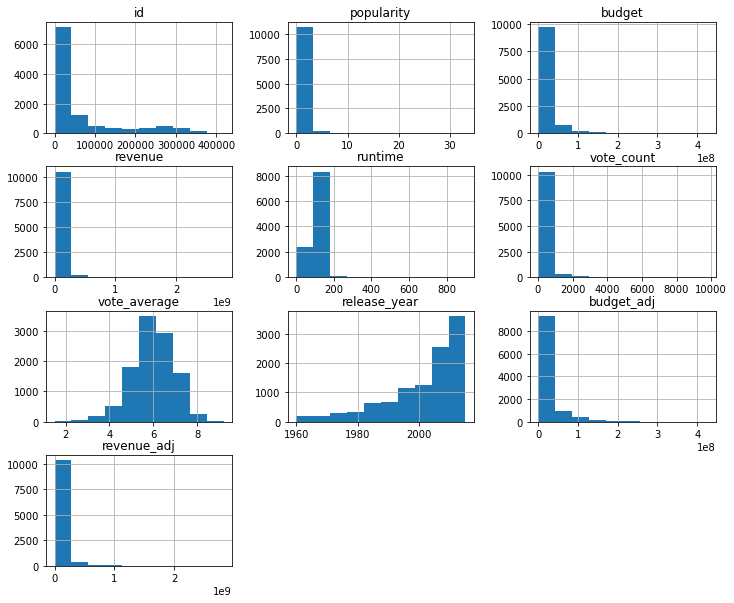

In [8]:
df.hist(figsize=(12, 10));

## Data Cleaning

 Befor we drop rows with no values or filling missing values, we drop the columns that are not necessary for answering the questions or have a lot of missing values.

In [9]:
df.drop(['imdb_id', 'homepage','tagline', 'overview','director', 'cast', 'original_title', 'production_companies', 'runtime','budget_adj', 'revenue_adj'],axis=1, inplace=True)

In [10]:
df.head()

,id,popularity,budget,revenue,keywords,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,car race|speed|revenge|suspense|car,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10866 non-null  int64  
 1   popularity    10866 non-null  float64
 2   budget        10866 non-null  int64  
 3   revenue       10866 non-null  int64  
 4   keywords      9373 non-null   object 
 5   genres        10843 non-null  object 
 6   release_date  10866 non-null  object 
 7   vote_count    10866 non-null  int64  
 8   vote_average  10866 non-null  float64
 9   release_year  10866 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 849.0+ KB


## Now we will drop the rows with missing values

After that the number of rows in the dataset will be 10843 

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9368 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9368 non-null   int64  
 1   popularity    9368 non-null   float64
 2   budget        9368 non-null   int64  
 3   revenue       9368 non-null   int64  
 4   keywords      9368 non-null   object 
 5   genres        9368 non-null   object 
 6   release_date  9368 non-null   object 
 7   vote_count    9368 non-null   int64  
 8   vote_average  9368 non-null   float64
 9   release_year  9368 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 805.1+ KB


## Remove duplicated rows

In [14]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.info()             

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9367 non-null   int64  
 1   popularity    9367 non-null   float64
 2   budget        9367 non-null   int64  
 3   revenue       9367 non-null   int64  
 4   keywords      9367 non-null   object 
 5   genres        9367 non-null   object 
 6   release_date  9367 non-null   object 
 7   vote_count    9367 non-null   int64  
 8   vote_average  9367 non-null   float64
 9   release_year  9367 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 805.0+ KB


In [17]:
df.budget.value_counts()

0           4530
20000000     177
15000000     174
25000000     168
10000000     161
            ... 
232000         1
61733          1
10831173       1
51500000       1
4653000        1
Name: budget, Length: 517, dtype: int64

In [18]:
df.revenue.value_counts()

0            4753
12000000        9
10000000        7
11000000        6
6000000         6
             ... 
1600000         1
549368315       1
173398518       1
64088552        1
49797148        1
Name: revenue, Length: 4483, dtype: int64

It does not make sense the the revenue or budget could be zero. It means that those values maybe missed

lets show the relation between budget and revenue

<AxesSubplot:xlabel='budget', ylabel='revenue'>

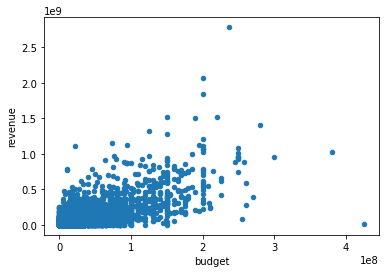

In [22]:
df.plot.scatter(x='budget', y='revenue')      

It seems like there is a positive correlation between budget and revnue

<a id='eda'></a>
## Exploratory Data Analysis



### Which year has the highest and lowest release of movies?

we will group our dataset by years and count the number of movies in that year

<AxesSubplot:xlabel='release_year', ylabel='id'>

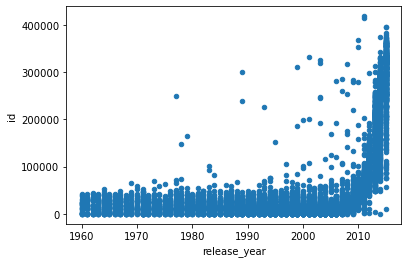

In [21]:
df.plot.scatter(x='release_year', y='id')      

In [23]:
data=df.groupby('release_year').count()['id']

In [24]:
data.head(20)

release_year
1960    30
1961    29
1962    32
1963    33
1964    42
1965    34
1966    45
1967    38
1968    36
1969    27
1970    38
1971    54
1972    38
1973    55
1974    44
1975    42
1976    45
1977    56
1978    62
1979    55
Name: id, dtype: int64

In [25]:
data.max()

557

In [26]:
data.min()

27

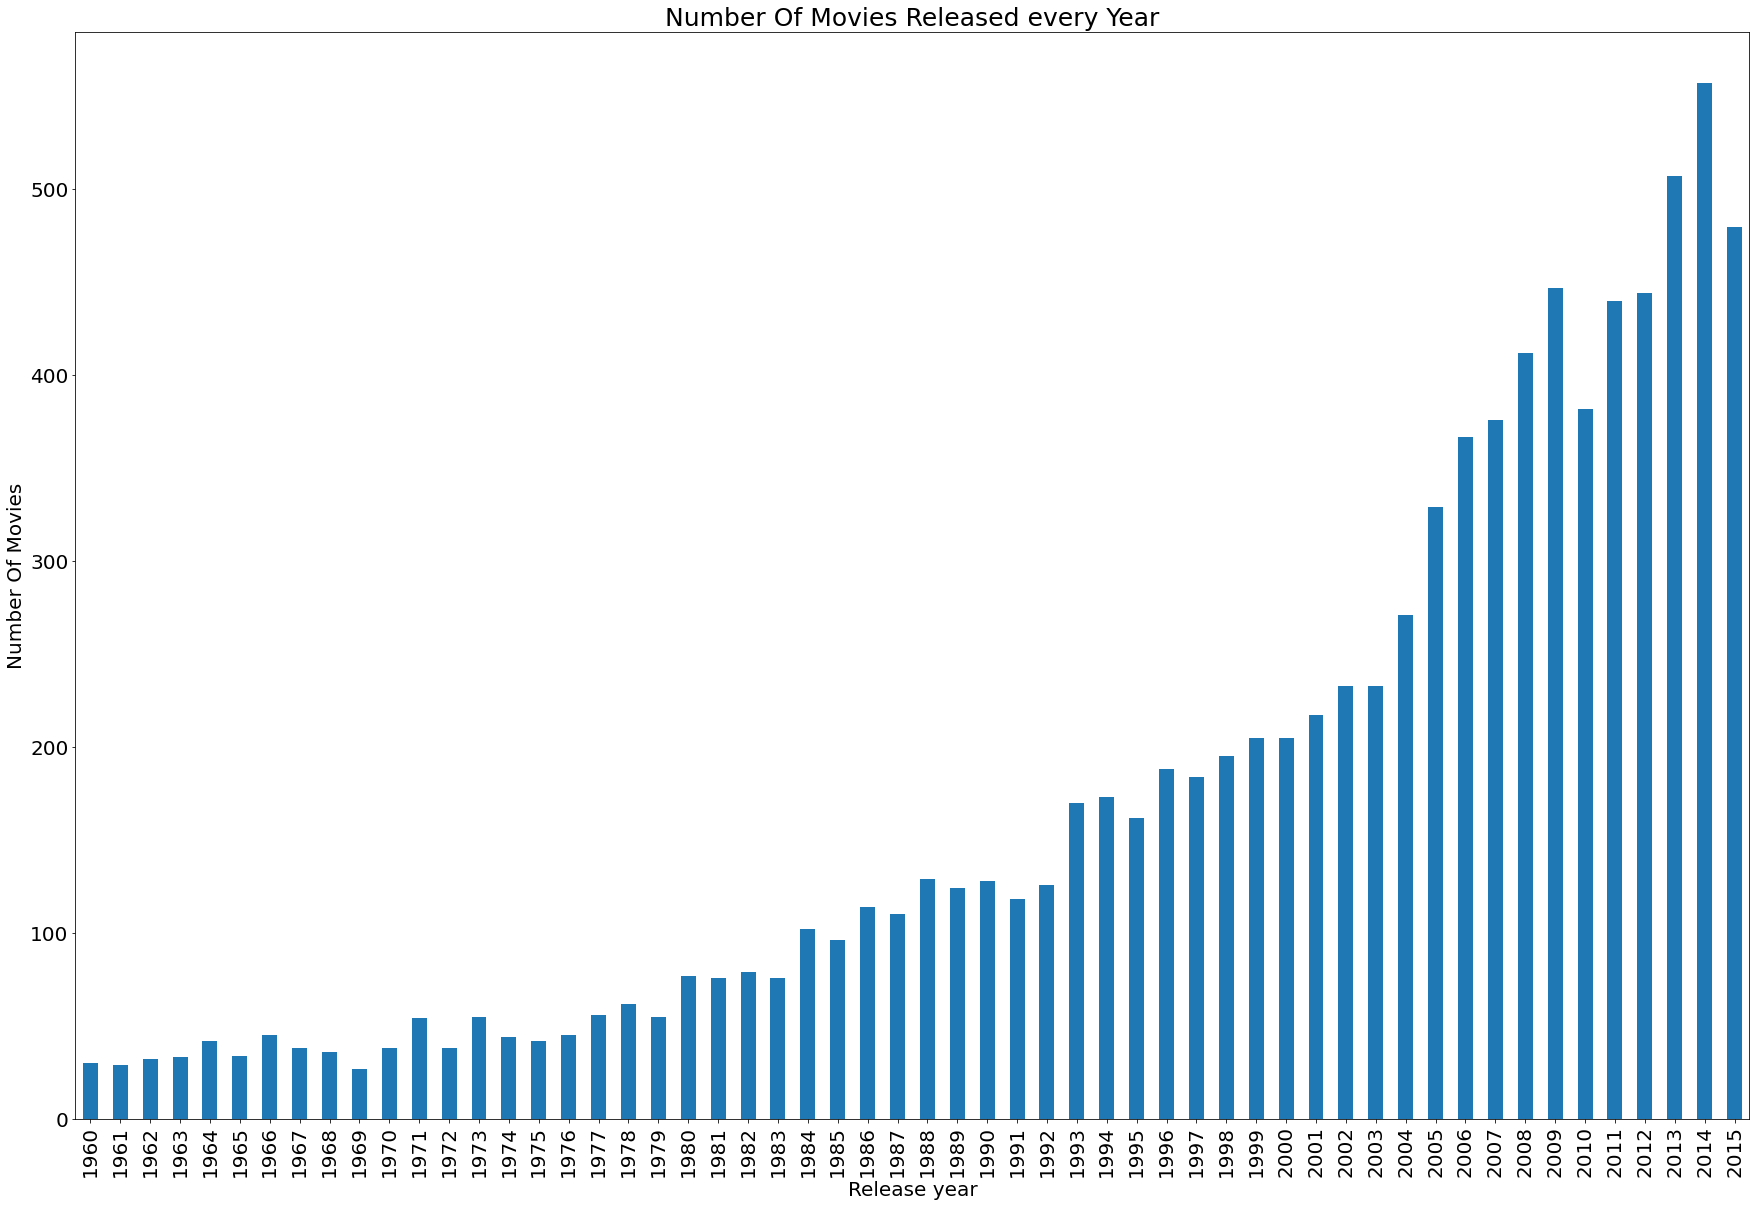

In [28]:
plotting(data, (30,20), 'bar', "Number Of Movies Released every Year", 'Release year', 'Number Of Movies')       #plotting(data, figure_size, plot_kind, plot_title, xlabel, ylabel)

After showing the plot and the output we can figure out that year 2014 has the highest release of movies(557) and year 1969 has the lowest release of movies(27)

### What genre that released in the most of movies?

we are going to check for how many times each genre repeated in all released movies and plotting bar chart

In [1]:
allgenres = df['genres'].str.cat(sep = '|')
splitgenres = pd.Series(allgenres.split('|'))

NameError: name 'df' is not defined

In [29]:
genres_count = splitgenres.value_counts()
genres_count

Drama              4209
Comedy             3282
Thriller           2584
Action             2125
Romance            1507
Horror             1418
Adventure          1328
Crime              1240
Science Fiction    1092
Family             1023
Fantasy             812
Mystery             730
Animation           556
Documentary         405
Music               358
History             306
War                 244
Western             156
TV Movie            132
Foreign             127
dtype: int64

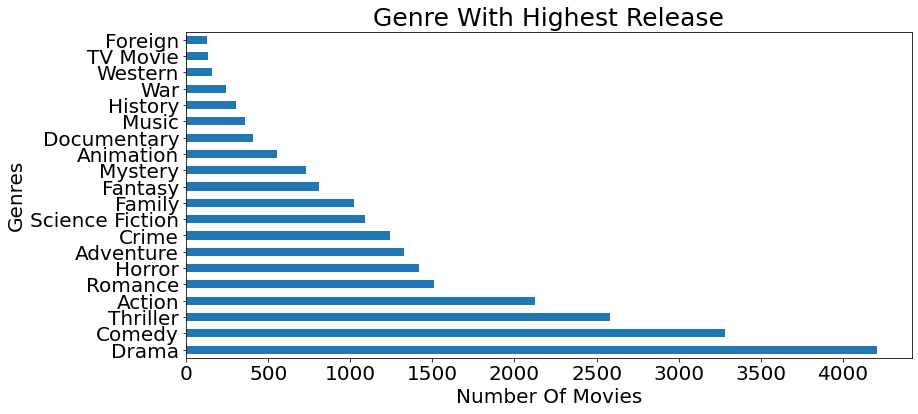

In [31]:
plotting(genres_count, (13,6), 'barh', 'Genre With Highest Release', 'Number Of Movies', 'Genres')        ##plotting(data, figure_size, plot_kind, plot_title, xlabel, ylabel)

As we see in the figure above, the Drama genre has the highest release of movies and Foreign genre is has the lowest

### Which genres are most popular from year to year?

we will create a dataframe contains genres as index and column for each year(1960 to 2015)

In [34]:
genres = list(splitgenres.unique())
genre_pop_df = pd.DataFrame(index=genres, columns= range(df.release_year.min(), df.release_year.max()+1))
genre_pop_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Science Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
genre_pop_df = genre_pop_df.fillna(value=0)
genre_pop_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Science Fiction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we need to get all the rows of genres in a list so we can check for a genre in each movie's genres and get its popularity and sum popularity for the same genre

In [39]:
def get_pop_value(genres_list, years, popularity):
    i=0
    for row_genre in genres_list:
        split_genre = list(map(str,row_genre.split('|')))
        genre_pop_df.loc[split_genre, years[i]] = genre_pop_df.loc[split_genre, years[i]] + popularity[i]
        i+=1

In [40]:
row_genres = list(map(str,(df['genres'])))
year       = np.array(df['release_year'])
popularity = np.array(df['popularity'])

get_pop_value(row_genres, year, popularity)

In [2]:
genre_pop_df.head()

NameError: name 'genre_pop_df' is not defined

After calculating the popularity for each genre in each year, we will visiualize the first 10 genres popularity just during the last 7 years for better visiualization

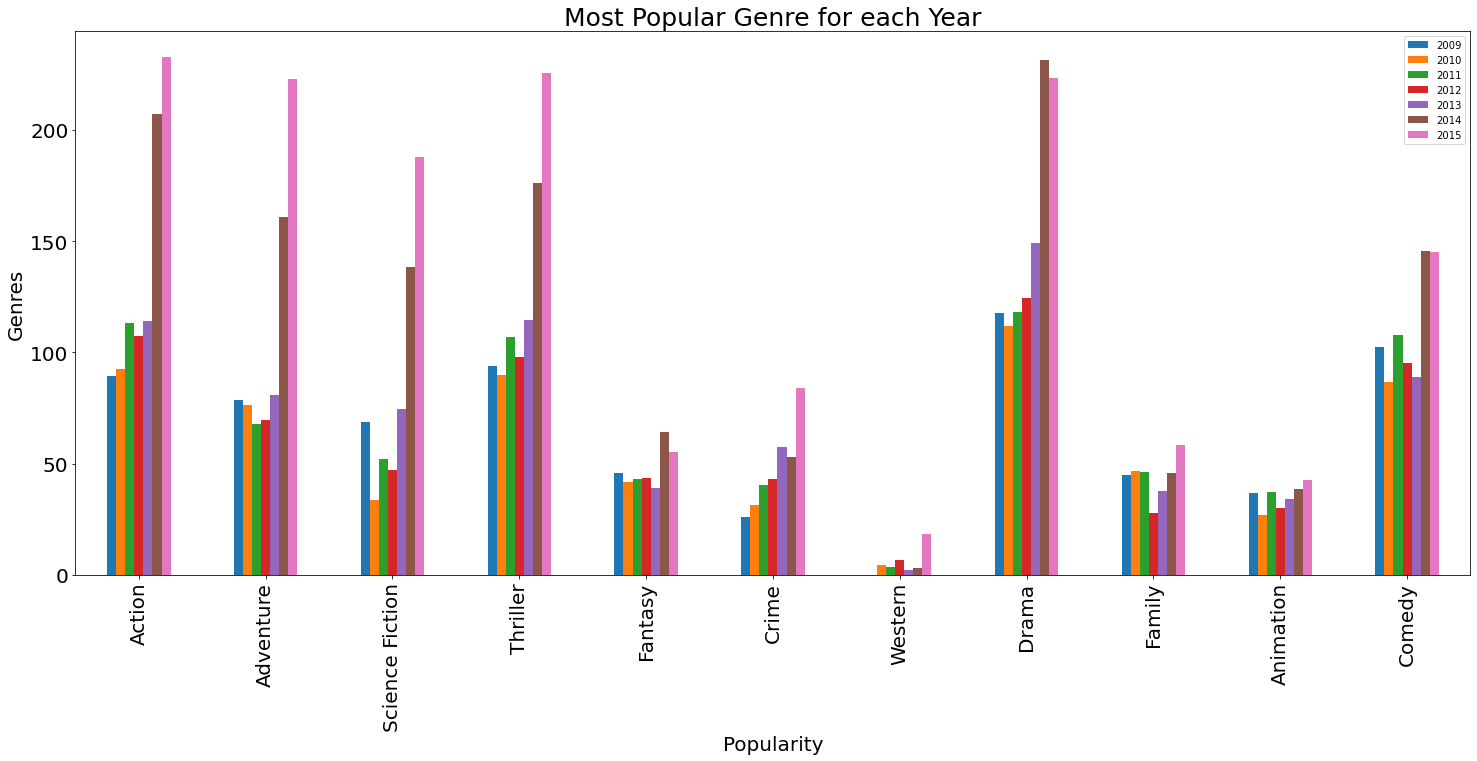

In [45]:
data_slice = genre_pop_df.iloc[:11,49:]
plotting(data_slice, (25,10), 'bar', "Most Popular Genre for each Year", "Popularity", "Genres")

As we can see in the figure above fo a slice of our data, the destribuation of how much is popular every genre from the slice in each year in the same slice.

<a id='conclusions'></a>
## Conclusions


From the EDA and answering the questions we mentioned above, we figured out the following:

Maximum number Of movies released In year 2014, and the minimum number is in year 1969.
Drama is the most demand genre, following by action, comedy and thriller and the least one is Foreign.


## Limitation

It is not forsure if we release movies contains the most popular genres like drama and comedy, the expectations we found will not work well and the movie will have good popularity that is because their should be a lot of features to put inot consideration. The cell that takes the most of running time is the cell in which we split the gnre column by'|'.